In [657]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [658]:
import re
import pandas as pd
import matplotlib.pyplot as plt

class MetricsAnalysis:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = self.load_data()
    
    def load_data(self):
        df = pd.read_csv(self.file_path, index_col=0)
        df.fillna(0, inplace=True)  
        return df    

    def visualize_data(self):
        df_cleaned = self.df.copy()
        def clean_column_name(column_name):
            return re.sub(r'^\d+\-', '', column_name) 
        df_cleaned.columns = [clean_column_name(col) for col in df_cleaned.columns]
        return df_cleaned
    

    def clean_column_name(column_name):
            return re.sub(r'^\d+\-', '', column_name) 

    def standalone_data(self):
        return self.df.loc[["q#", "qmod"], :] 
            
    def hosted_data(self):
        return self.df.loc[["cirq", "qapl", "qiskit", "qrisp"], :] 
    

    def all_data(self):
        return self.df.loc[["cirq", "qapl", "qiskit", "qrisp", "qmod", "q#"], :] 
    
    def custom_color_palette(self, palette="Set3"):
        """
        Define a custom color palette for the languages and metrics (LOC, CC).
        """
        # Obtener la paleta 'Set3' de seaborn (8 colores disponibles por defecto)
        palette = sns.color_palette(palette)  
        color_map = {
            'cirq': palette[0],   # Primer color para 'cirq'
            'qapl': palette[11],   # Segundo color para 'qapl'
            'qiskit': palette[2], # Tercer color para 'qiskit'
            'qrisp': palette[8],  # Cuarto color para 'qrisp'
            'qmod': palette[9],   # Quinto color para 'qmod'
            'q#': palette[5],     # Sexto color para 'q#'
            'qasm': palette[6],   # Séptimo color para 'qasm'
            'classic': palette[7], # Octavo color para 'classic'
            'LOC': palette[3] ,   # Color para la métrica 'LOC'
            'CC': palette[4]     # Color para la métrica 'CC'
        }
        return color_map

    '''def select_method(self, method="mean"):        
        self.df.loc["qapl", "03-simon"] = None
        # Reemplazar el valor de "simon" en "qapl"
        if method == "mean":
            simon_mean = self.df["03-simon"].mean()  # Calculamos el promedio de "simon" (sin contar valores faltantes)
            self.df.loc["qapl", "03-simon"] = int(round(simon_mean))  # Reemplazamos el valor de "simon" para qapl con el promedio
        elif method == "interpolation":
            qapl_mean =  self.df.loc["qapl", ["01-deutch-jotza", "02-vazirani", "04-grover"]].mean()
            self.df.loc["qapl", "03-simon"] = int(round(qapl_mean))   # Asignar valor redondeado
        return self.df  
    '''
 
    def select_language_type(self, language_type=None):
        if language_type == "hosted":
            return self.hosted_data()
        elif language_type == "standalone":
            return self.standalone_data()
        elif language_type == "all":
            return self.all_data()
        else:
            return self.df



    def plot_metrics(self, data: dict, filter: str = 'all', palette="Set3", save_path: str = None):
        df=self.select_language_type(language_type=filter)
        if filter == 'hosted':
            df = self.hosted_data()
        elif filter == 'standalone':
            df = self.standalone_data() 
        color_map = self.custom_color_palette(palette)
        colors = [color_map.get(lang, 'gray') for lang in df.index]        
        plt.figure(figsize=(10, 4))
        ax = df.T.plot(kind='bar', figsize=(10, 4), color=colors, title=data['title'])
        ax.legend(title="Programming Language", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xlabel(data['xlabel'])
        plt.ylabel(data['ylabel'])
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Figura guardada en: {save_path}")        
        plt.show()

    def compare_against(self, reference: str, palette="Set3", save_path: str = None):
        if reference not in self.df.index:
            raise ValueError(f"{reference} data not found")        
        fig, ax = plt.subplots(figsize=(12, 6))
        df_compare = self.df.div(self.df.loc[reference])  
        df_compare.drop(index=reference, inplace=True)  
        for lang in df_compare.index:
            ax.plot(df_compare.columns, df_compare.loc[lang], marker='o', label=lang)        
        ax.axhline(1, color='gray', linestyle='--', alpha=0.7)
        ax.set_title(f"Normalized comparison: Quantum Programming Languages vs {reference}")
        ax.set_xlabel("Algorithms")
        ax.set_ylabel(f"Ratio respect to {reference}")
        ax.legend(title="Languages")
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        plt.xticks(rotation=45)
        plt.tight_layout()       
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Figura guardada en: {save_path}")
        plt.show()
        

    def compare_against2(self, reference: str, palette="Set3", save_path: str = None):
        if reference not in self.df.index:
            raise ValueError(f"{reference} data not found.")        
        fig, ax = plt.subplots(figsize=(12, 6))
        df_compare = self.df.div(self.df.loc[reference]) 
        df_compare.drop(index=reference, inplace=True)          
        for lang in df_compare.index:
            ax.plot(df_compare.columns, df_compare.loc[lang], marker='o', label=lang)        
        ax.axhline(1, color='gray', linestyle='--', alpha=0.7)
        ax.set_title(f"Normalized comparison: Quantum Programming Languages vs {reference}")
        ax.set_xlabel("Algorithms")
        ax.set_ylabel(f"Ratio respect to {reference}")
        ax.legend(title="Languages")
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        plt.xticks(rotation=45)
        plt.tight_layout()        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Figura guardada en: {save_path}")
        plt.show()
        

    def compare_averages(self, metric: str, palette="Set3", save_path: str = None, filter: str = None):
        df = self.select_language_type(language_type=filter) 
        df_avg = df.mean(axis=1) 
        df_avg = df_avg.sort_values()        
        color_map = self.custom_color_palette(palette)        
        colors = [color_map.get(lang, 'gray') for lang in df_avg.index]
        fig, ax = plt.subplots(figsize=(12, 6))
        df_avg.plot(kind="bar", color=colors,  ax=ax)
        ax.set_title(f"Average {metric} Across Quantum Programming Languages", fontsize=14)
        ax.set_xlabel("Quantum Programming Languages")
        ax.set_ylabel(f"Average {metric} for Quantum Algorithms", fontsize=12)
        ax.grid(axis="y", linestyle="--", alpha=0.7)
        plt.xticks(rotation=45)
        plt.tight_layout()    
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Figura guardada en: {save_path}")
        plt.show()
        

    def plot_loc_vs_cc(self, df_cc, palette="Set3", save_path: str = None):
        """
        Plots LOC vs Cyclomatic Complexity in a scatter plot for all quantum programming languages.        
        :param df_cc: DataFrame containing the Cyclomatic Complexity (CC) data.
        """
        df_avg_loc = self.df.mean(axis=1)  # Promedio de LOC por lenguaje
        df_avg_cc = df_cc.mean(axis=1)  # Promedio de CC por lenguaje
        fig, ax = plt.subplots(figsize=(10, 6))
        color_map = self.custom_color_palette(palette)
        for lang, loc, cc in zip(df_avg_loc.index, df_avg_loc, df_avg_cc):
            color = color_map.get(lang, 'gray')
            ax.scatter(loc, cc, label=lang, s=100,color=color)
            ax.text(loc, cc, lang, fontsize=10, ha='right', va='bottom')
        ax.set_title("LOC vs Cyclomatic Complexity in Quantum Programming Languages")
        ax.set_xlabel("Average Lines of Code (LOC)")
        ax.set_ylabel("Average Cyclomatic Complexity (CC)")
        ax.grid(True, linestyle='--', alpha=0.7)
        plt.legend(title="Languages")
        plt.tight_layout()     
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Figura guardada en: {save_path}")
        plt.show()        

    
    def plot_loc_cc_bars(self, df_cc, save_path: str = None):
        """
        Compares LOC vs Cyclomatic Complexity in a bar chart for all quantum programming languages.
        
        :param df_cc: DataFrame containing the Cyclomatic Complexity (CC) data.
        """
        df_avg_loc = self.df.mean(axis=1)  # Average LOC per language
        df_avg_cc = df_cc.mean(axis=1)  # Average CC per language
        color_map = self.custom_color_palette()
        colors = [color_map.get(lang, 'gray') for lang in  ['LOC', 'CC']]
        # Crear un DataFrame de comparación
        df_comparison = pd.DataFrame({'LOC': df_avg_loc, 'CC': df_avg_cc})
        # Graficar el DataFrame
        df_comparison.plot(kind='bar', figsize=(12, 6), color=colors, width=0.7)
        plt.title("Comparison of LOC vs Cyclomatic Complexity in Quantum Programming Languages")
        plt.xlabel("Quantum Programming Languages")
        plt.ylabel("Metric Value")
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.legend(title="Metrics")
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Figura guardada en: {save_path}")
        plt.show()


    def plot_heatmap(self, df, metric, save_path: str = None):
        """
        Plots a heatmap to show the correlation between different quantum algorithms.

        :param df: DataFrame containing the metric data (either LOC or CC).
        :param metric: "LOC" or "CC".
        """
        plt.figure(figsize=(10, 6))
        sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
        plt.title(f"Correlation Heatmap of {metric} Between Quantum Algorithms")       

        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Figura guardada en: {save_path}")
        plt.show()
        


    def plot_radar_chart(self, df_loc, df_cc, save_path: str = None):
        """
        Plots a radar chart comparing LOC and CC for each quantum programming language.

        :param df_loc: DataFrame containing LOC data.
        :param df_cc: DataFrame containing CC data.
        """
        color_map = self.custom_color_palette()
       
            
        categories = df_loc.index.tolist()
        values_loc = df_loc.mean(axis=1).tolist()
        values_cc = df_cc.mean(axis=1).tolist()

        angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()

        values_loc += values_loc[:1]  # Cerrar el gráfico
        values_cc += values_cc[:1]
        angles += angles[:1]

        fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

        ax.fill(angles, values_loc, color=color_map.get("LOC", 'gray'), alpha=0.3, label="LOC")
        ax.fill(angles, values_cc, color=color_map.get("CC", 'gray'), alpha=0.3, label="CC")

        ax.set_yticklabels([])
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories, fontsize=10)

        plt.title("Comparison of LOC and CC Across Quantum Programming Languages", size=12)
        plt.legend(loc="upper right")
        

        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Figura guardada en: {save_path}")
        plt.show()
        

    


Figura guardada en: results/graphics/01_loc_all_quantum.png


<Figure size 1000x400 with 0 Axes>

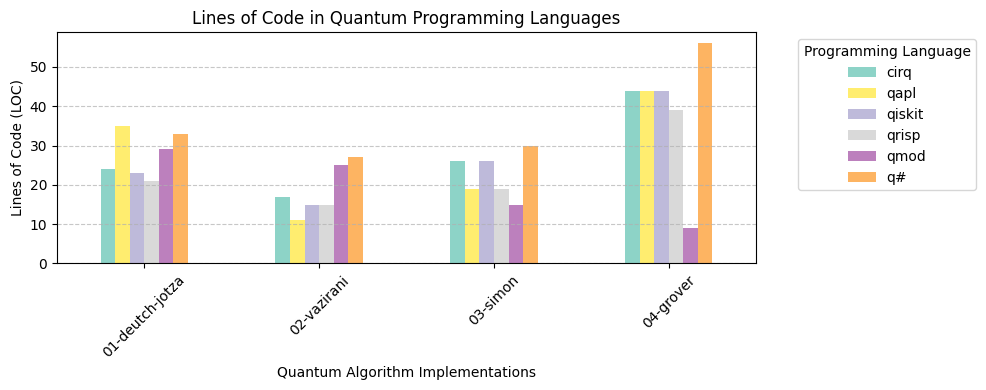

In [659]:
analysis = MetricsAnalysis("results/loc.csv")

analysis.plot_metrics({
    'title': 'Lines of Code in Quantum Programming Languages',
    'xlabel': 'Quantum Algorithm Implementations',
    'ylabel': 'Lines of Code (LOC)',
    'kind': 'bar'
}, filter='all', save_path="results/graphics/01_loc_all_quantum.png")


Figura guardada en: results/graphics/01_loc_all_quantum.png


<Figure size 1000x400 with 0 Axes>

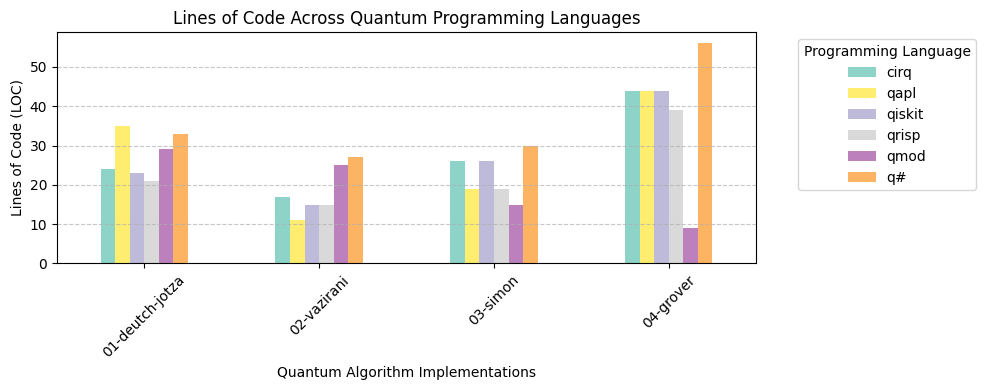

In [660]:
analysis = MetricsAnalysis("results/loc.csv")

analysis.plot_metrics({
    'title': 'Lines of Code Across Quantum Programming Languages',
    'xlabel': 'Quantum Algorithm Implementations',
    'ylabel': 'Lines of Code (LOC)',
    'kind': 'bar'
}, filter='all', save_path="results/graphics/01_loc_all_quantum.png")


Figura guardada en: results/graphics/02_loc_hosted_quantum.png


<Figure size 1000x400 with 0 Axes>

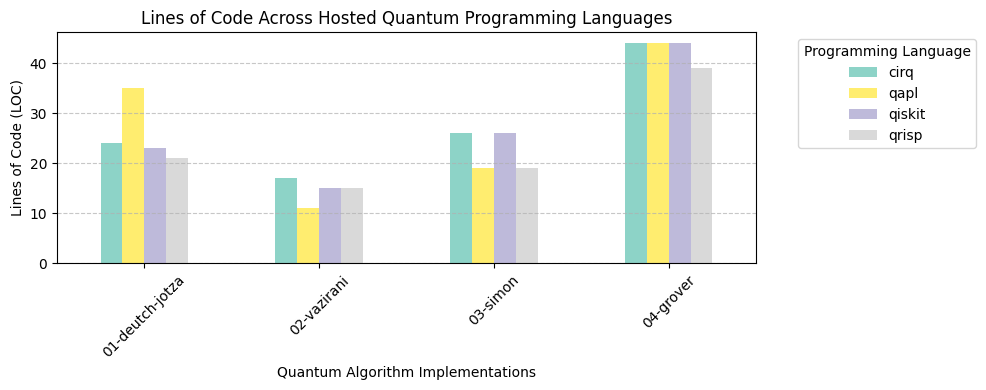

In [661]:
analysis.plot_metrics({
    'title': 'Lines of Code Across Hosted Quantum Programming Languages',
    'xlabel': 'Quantum Algorithm Implementations',
    'ylabel': 'Lines of Code (LOC)',
    'legend_fontsize': 12,
    'label_fontsize': 12,
    'title_fontsize': 13,
    'ticks_fontsize': 12,
    'kind': 'bar'
}, filter='hosted', save_path="results/graphics/02_loc_hosted_quantum.png")

Figura guardada en: results/graphics/03_loc_standalone_quantum.png


<Figure size 1000x400 with 0 Axes>

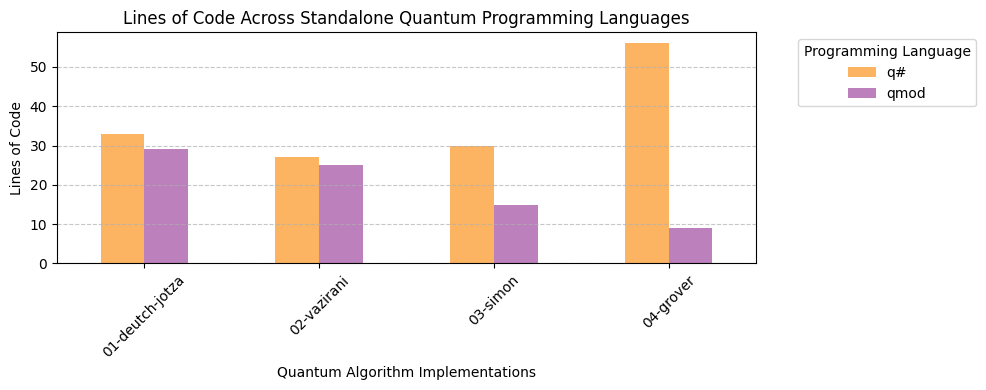

In [662]:
analysis.plot_metrics({
    'title': 'Lines of Code Across Standalone Quantum Programming Languages',
    'xlabel': 'Quantum Algorithm Implementations',
    'ylabel': 'Lines of Code',
    'legend_fontsize': 12,
    'label_fontsize': 12,
    'title_fontsize': 13,
    'ticks_fontsize': 12,
    'kind': 'bar'
}, filter='standalone', save_path="results/graphics/03_loc_standalone_quantum.png")

Figura guardada en: results/graphics/04_cc_all_quantum.png


<Figure size 1000x400 with 0 Axes>

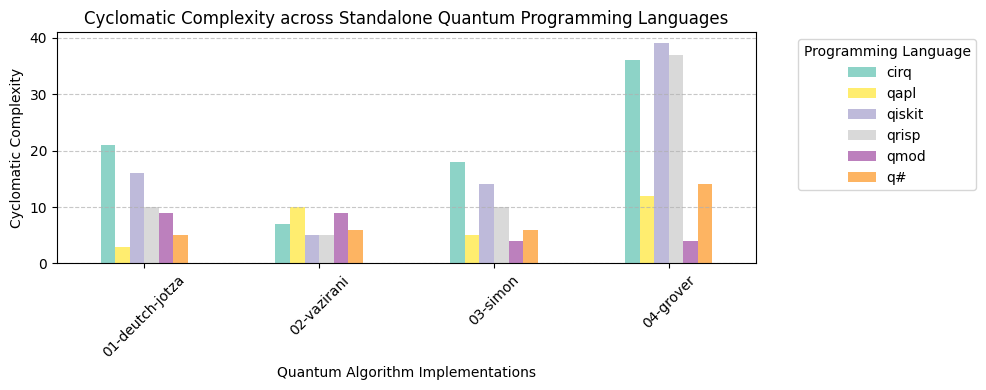

In [663]:
analysis = MetricsAnalysis("results/cyclomatic_complexity_calculator.csv")
analysis.plot_metrics({
    'title': 'Cyclomatic Complexity across Standalone Quantum Programming Languages',
    'xlabel': 'Quantum Algorithm Implementations',
    'ylabel': 'Cyclomatic Complexity',
    'kind': 'bar'
}, filter='all', save_path="results/graphics/04_cc_all_quantum.png")

Figura guardada en: results/graphics/05_cc_standalone_quantum.png


<Figure size 1000x400 with 0 Axes>

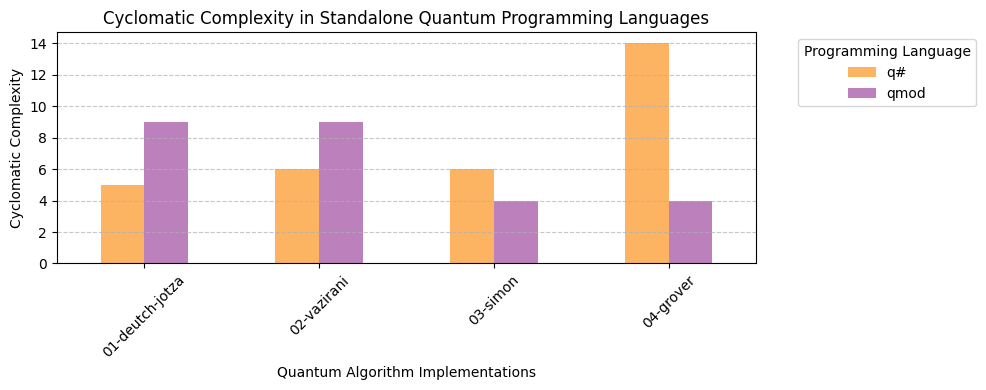

In [664]:
analysis = MetricsAnalysis("results/cyclomatic_complexity_calculator.csv")
analysis.plot_metrics({
    'title': 'Cyclomatic Complexity in Standalone Quantum Programming Languages',
    'xlabel': 'Quantum Algorithm Implementations',
    'ylabel': 'Cyclomatic Complexity',
    'kind': 'bar'
}, filter='standalone', save_path="results/graphics/05_cc_standalone_quantum.png")


Figura guardada en: results/graphics/06_cc_hosted_quantum.png


<Figure size 1000x400 with 0 Axes>

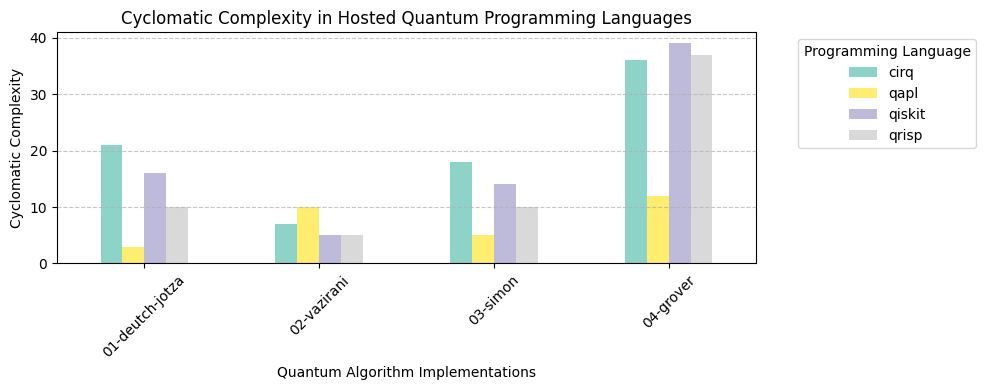

In [665]:
analysis = MetricsAnalysis("results/cyclomatic_complexity_calculator.csv")
analysis.plot_metrics({
    'title': 'Cyclomatic Complexity in Hosted Quantum Programming Languages',
    'xlabel': 'Quantum Algorithm Implementations',
    'ylabel': 'Cyclomatic Complexity',
    'kind': 'bar'
}, filter='hosted', save_path="results/graphics/06_cc_hosted_quantum.png")

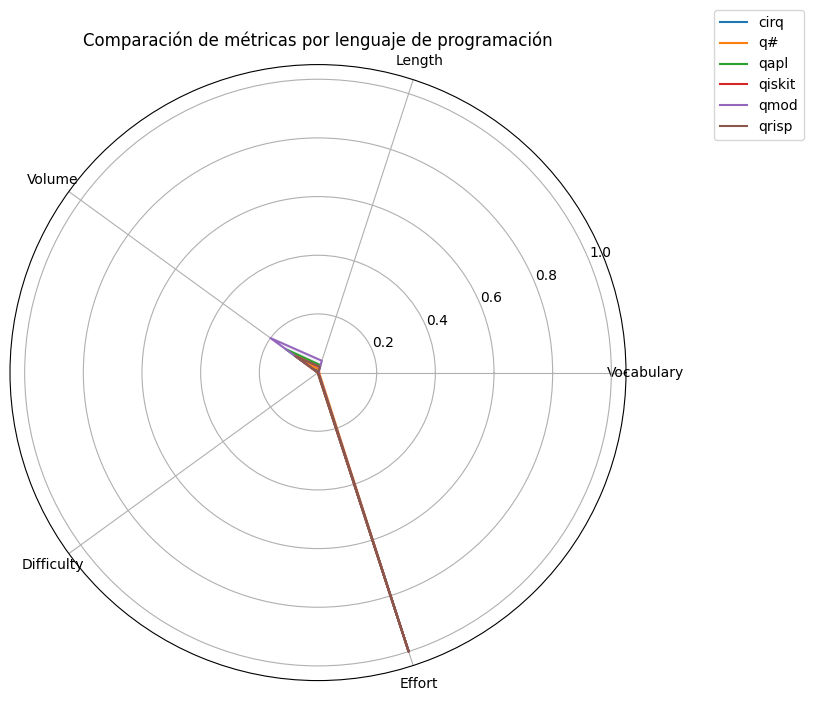

In [666]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def load_data(file_path):
    df = pd.read_csv(file_path)
    df = df[~df["Directory"].isin(["classic", "qasm"])]  # Excluir classic y qasm
    df_grouped = df.groupby("Directory")[["Vocabulary", "Length", "Volume", "Difficulty", "Effort"]].mean()
    return df_grouped.to_dict(orient="index")

data = load_data("results/halstead.csv")
labels = ["Vocabulary", "Length", "Volume", "Difficulty", "Effort"]
theta = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

def normalize(values):
    return [v / max(values) for v in values]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": "polar"})

for lang, metrics in data.items():
    values = list(metrics.values())
    values_normalized = normalize(values)
    values_normalized += values_normalized[:1]
    ax.plot(theta + [theta[0]], values_normalized, label=lang)
    ax.fill(theta + [theta[0]], values_normalized, alpha=0.1)

ax.set_xticks(theta)
ax.set_xticklabels(labels)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.title("Comparación de métricas por lenguaje de programación")
plt.show()


In [667]:
#analysis.compare_against2("qasm")

In [668]:
#analysis.compare_against("classic")

Figura guardada en: results/graphics/07_loc_avg_quantum.png


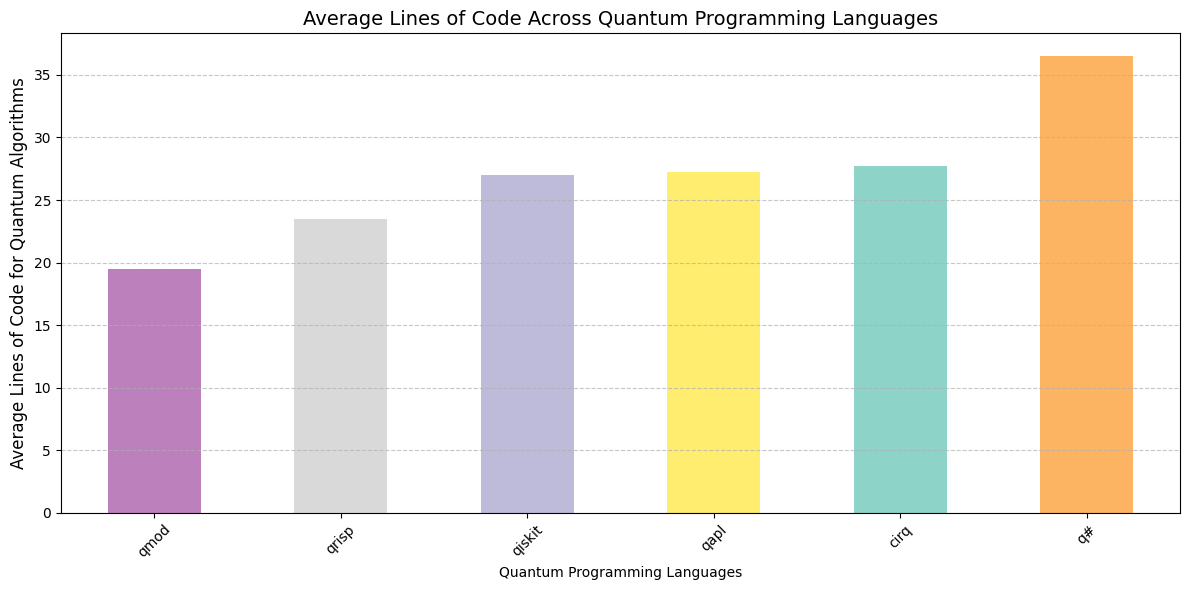

In [669]:
analysis = MetricsAnalysis("results/loc.csv")
analysis.compare_averages(metric="Lines of Code", save_path="results/graphics/07_loc_avg_quantum.png", filter="all")

Figura guardada en: results/graphics/08_cc_avg_quantum.png


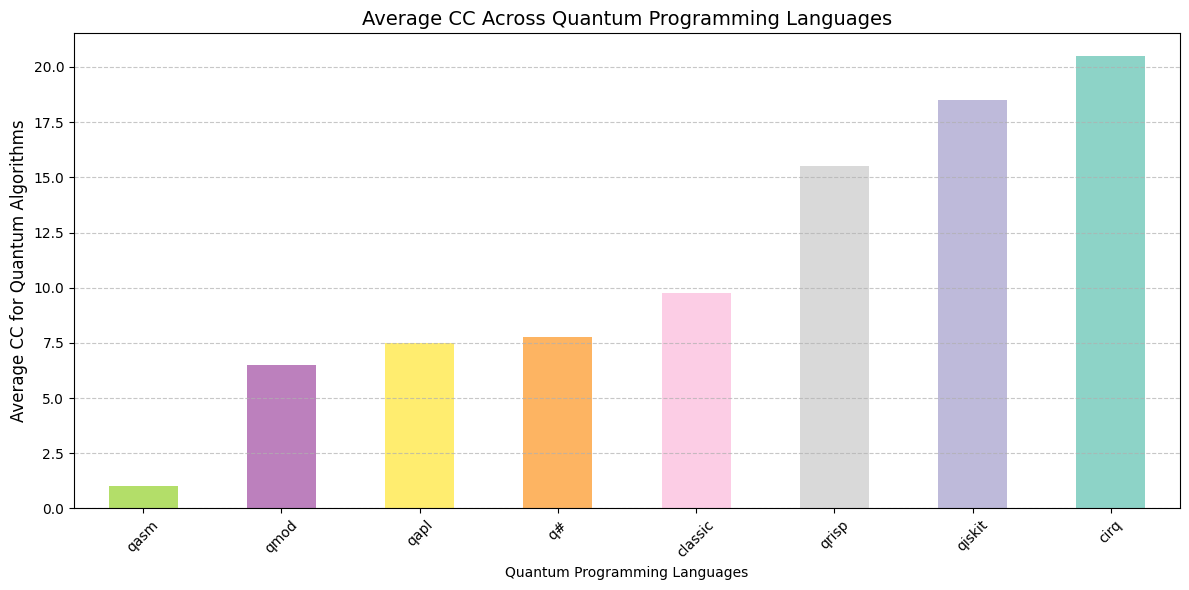

In [670]:
analysis = MetricsAnalysis("results/cyclomatic_complexity_calculator.csv", )
analysis.compare_averages(metric="CC", save_path="results/graphics/08_cc_avg_quantum.png")

Figura guardada en: results/graphics/09_cc_loc_quantum.png


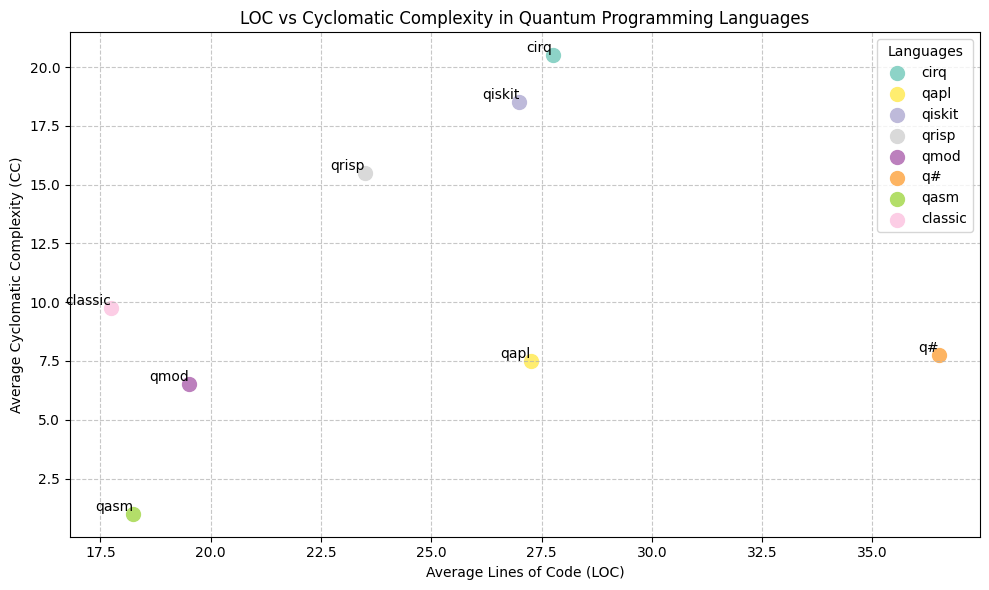

In [671]:
# Cargar los dos archivos CSV (LOC y CC)
df_loc = MetricsAnalysis("results/loc.csv")  # Carga LOC
df_cc = pd.read_csv("results/cyclomatic_complexity_calculator.csv", index_col=0)  # Carga CC

# Graficar LOC vs CC en un scatter plot
df_loc.plot_loc_vs_cc(df_cc, save_path="results/graphics/09_cc_loc_quantum.png")


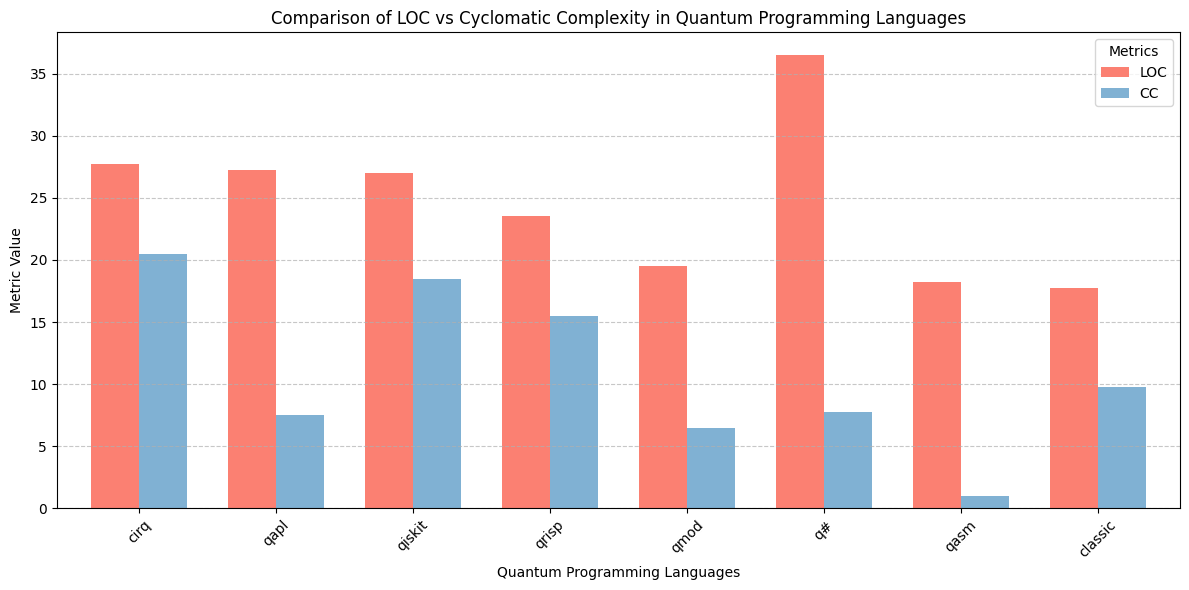

In [672]:
# Cargar los dos archivos CSV (LOC y CC)
df_loc = MetricsAnalysis("results/loc.csv")
df_cc = pd.read_csv("results/cyclomatic_complexity_calculator.csv", index_col=0)

# Graficar LOC vs CC en barras
df_loc.plot_loc_cc_bars(df_cc)


In [673]:
# Cargar los datos correctamente
df_loc = MetricsAnalysis("results/loc.csv")  # Instancia de la clase
df_cc = pd.read_csv("results/cyclomatic_complexity_calculator.csv", index_col=0)  # DataFrame CC

# Ahora pasamos los DataFrames correctos
#df_loc.plot_heatmap(df_loc.df, "LOC")  # ✅ Ahora pasamos el DataFrame de LOC
#df_loc.plot_heatmap(df_cc, "CC")  # ✅ Pasamos el DataFrame de CC


Figura guardada en: results/graphics/10_cc_loc_quantum.png


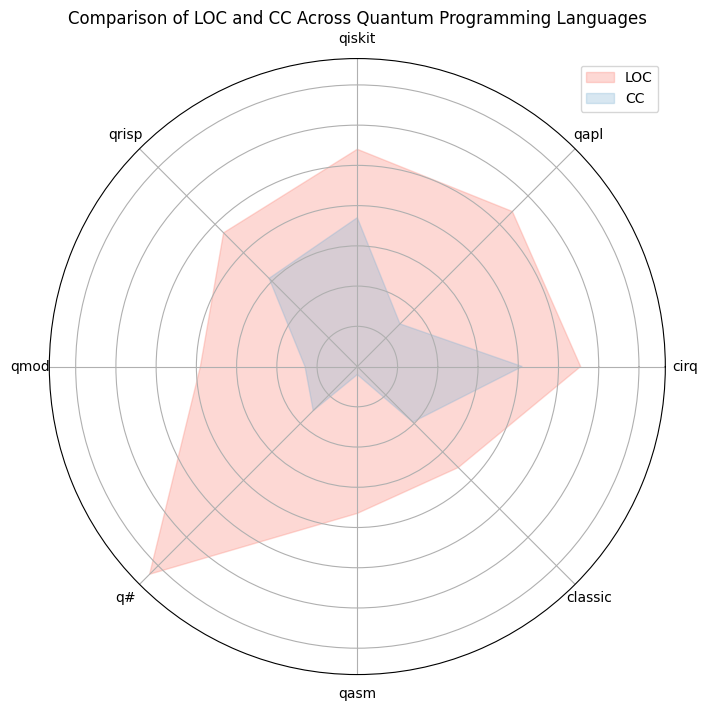

In [674]:
df_loc = MetricsAnalysis("results/loc.csv") 
df_cc = pd.read_csv("results/cyclomatic_complexity_calculator.csv", index_col=0)
df_loc.plot_radar_chart(df_loc.df, df_cc, save_path="results/graphics/10_cc_loc_quantum.png") 

In [675]:
df_loc = MetricsAnalysis("results/loc.csv") 
df_loc.visualize_data()

,deutch-jotza,vazirani,simon,grover
cirq,24,17,26,44
qapl,35,11,19,44
qiskit,23,15,26,44
qrisp,21,15,19,39
qmod,29,25,15,9
q#,33,27,30,56
qasm,14,17,12,30
classic,16,14,28,13


In [676]:
df_cyclomatic = MetricsAnalysis("results/cyclomatic_complexity_calculator.csv") 
df_cyclomatic.visualize_data()

,deutch-jotza,vazirani,simon,grover
cirq,21,7,18,36
qapl,3,10,5,12
qiskit,16,5,14,39
qrisp,10,5,10,37
qmod,9,9,4,4
q#,5,6,6,14
qasm,1,1,1,1
classic,11,9,14,5


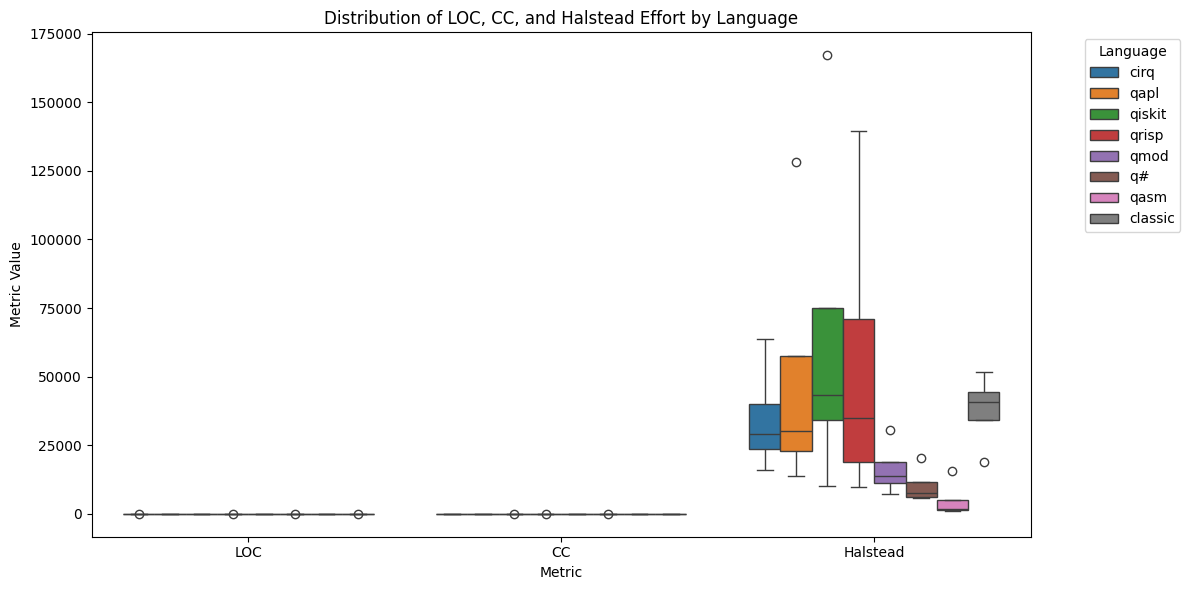

In [677]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de LOC
loc_data = {
    'Language': ['cirq', 'qapl', 'qiskit', 'qrisp', 'qmod', 'q#', 'qasm', 'classic'],
    '01-deutch-jotza': [24, 35, 23, 21, 29, 33, 14, 16],
    '02-vazirani': [17, 11, 15, 15, 25, 27, 17, 14],
    '03-simon': [26, 19, 26, 19, 15, 30, 12, 28],
    '04-grover': [44, 44, 44, 39, 9, 56, 30, 13]
}
df_loc = pd.DataFrame(loc_data)
df_loc = df_loc.melt(id_vars='Language', var_name='Algorithm', value_name='LOC')

# Datos de CC
cc_data = {
    'Language': ['cirq', 'qapl', 'qiskit', 'qrisp', 'qmod', 'q#', 'qasm', 'classic'],
    '01-deutch-jotza': [21, 3, 16, 10, 9, 5, 1, 11],
    '02-vazirani': [7, 10, 5, 5, 9, 6, 1, 9],
    '03-simon': [18, 5, 14, 10, 4, 6, 1, 14],
    '04-grover': [36, 12, 39, 37, 4, 14, 1, 5]
}
df_cc = pd.DataFrame(cc_data)
df_cc = df_cc.melt(id_vars='Language', var_name='Algorithm', value_name='CC')

# Datos de Halstead Effort
halstead_effort = [
    31973, 15946, 26016, 63863,
    34085, 13956, 25983, 128088,
    42149, 10299, 44293, 167119,
    47922, 9892, 21831, 139580,
    30382, 12745, 14951, 7137,
    8660, 5886, 6381, 20273,
    1396, 1752, 1091, 15516,
    41786, 18893, 51753, 39358
]
halstead_languages = ['cirq']*4 + ['qapl']*4 + ['qiskit']*4 + ['qrisp']*4 + ['qmod']*4 + ['q#']*4 + ['qasm']*4 + ['classic']*4
halstead_algorithms = ['01-deutch-jotza', '02-vazirani', '03-simon', '04-grover'] * 8
df_halstead = pd.DataFrame({
    'Language': halstead_languages,
    'Algorithm': halstead_algorithms,
    'Halstead': halstead_effort
})

# Unimos todo
df_all = pd.merge(df_loc, df_cc, on=['Language', 'Algorithm'])
df_all = pd.merge(df_all, df_halstead, on=['Language', 'Algorithm'])

# Derretimos para graficar en un solo boxplot
df_melted = df_all.melt(id_vars=['Language', 'Algorithm'], 
                        value_vars=['LOC', 'CC', 'Halstead'], 
                        var_name='Metric', value_name='Value')

# Creamos el boxplot combinado
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x="Metric", y="Value", hue="Language")
plt.title("Distribution of LOC, CC, and Halstead Effort by Language")
plt.ylabel("Metric Value")
plt.xlabel("Metric")
plt.legend(title="Language", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


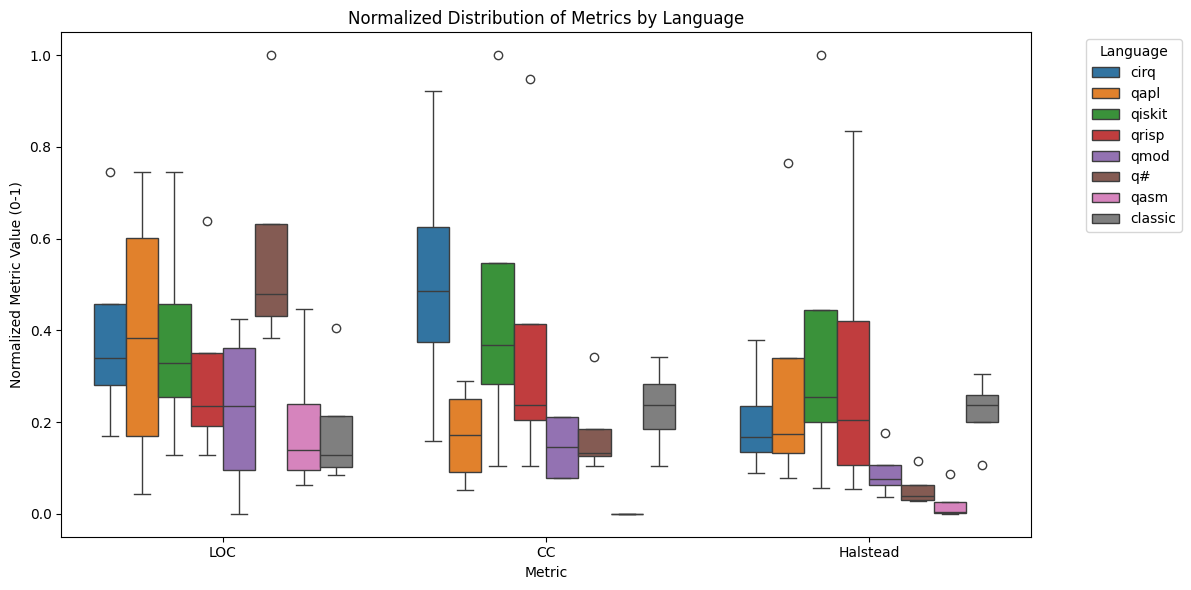

In [678]:
import numpy as np

# Normalizamos los datos entre 0 y 1 (Min-Max Scaling) por métrica
df_normalized = df_all.copy()
for metric in ['LOC', 'CC', 'Halstead']:
    min_val = df_all[metric].min()
    max_val = df_all[metric].max()
    df_normalized[metric] = (df_all[metric] - min_val) / (max_val - min_val)

# Creamos boxplot con valores normalizados
df_norm_melted = df_normalized.melt(id_vars=['Language', 'Algorithm'],
                                    value_vars=['LOC', 'CC', 'Halstead'],
                                    var_name='Metric', value_name='Normalized Value')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_norm_melted, x="Metric", y="Normalized Value", hue="Language")
plt.title("Normalized Distribution of Metrics by Language")
plt.ylabel("Normalized Metric Value (0-1)")
plt.xlabel("Metric")
plt.legend(title="Language", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\franc\AppData\Local\Temp\ipykernel_29980\461929355.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(radar_data))


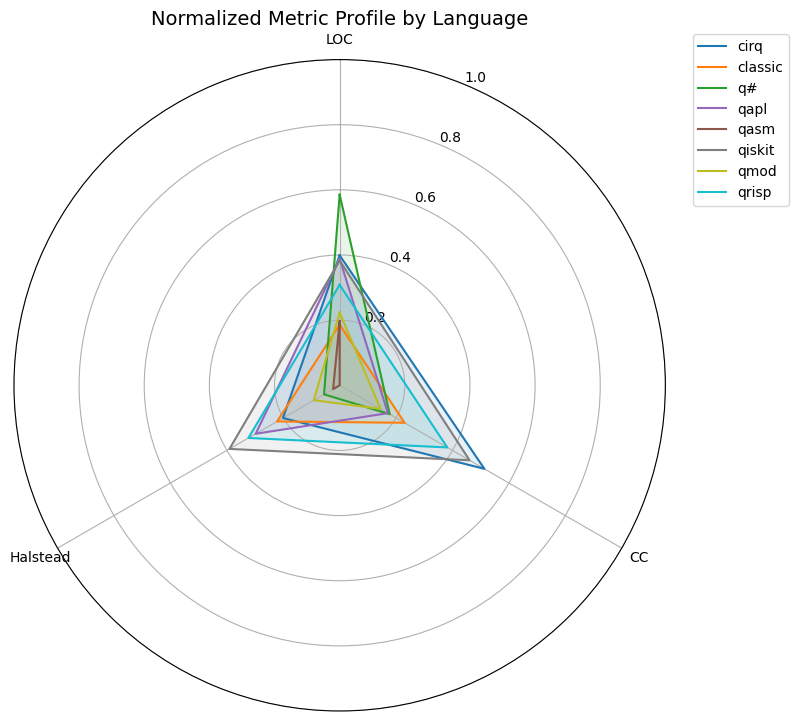

In [679]:
import matplotlib.pyplot as plt
import numpy as np

# Preparamos datos para el radar chart: promedio por lenguaje y métrica (ya normalizado)
radar_data = df_normalized.groupby("Language")[['LOC', 'CC', 'Halstead']].mean()

# Ejes del radar
labels = radar_data.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # cerrar el círculo

# Crear gráfico
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Colores únicos por lenguaje
colors = plt.cm.get_cmap("tab10", len(radar_data))

# Graficamos cada lenguaje
for idx, (language, row) in enumerate(radar_data.iterrows()):
    values = row.tolist()
    values += values[:1]  # cerrar el círculo
    ax.plot(angles, values, label=language, color=colors(idx))
    ax.fill(angles, values, alpha=0.1, color=colors(idx))

# Configuración del radar
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_ylim(0, 1)
ax.set_title("Normalized Metric Profile by Language", size=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.05))
plt.tight_layout()
plt.show()
